# Data processing

In this notebook, I have used list of molecules given data channel in slack and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [2]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
import sys
sys.path.append('../src')
from smiles_processing import standardise_smiles
from InChIKey_generation import generate_inchikey

%matplotlib inline

[28/03/24 11:56:44 standardiser.standardise WARNING] Running under Windows: must disable use of timeout


In [3]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
df = pd.read_csv('../data/input.csv', delimiter=',')
df.head(6)

,smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...
5,CN1C(=O)C2=C(N=C(N3CCC[C@@H](N)C3)N2CC2=CC(F)=...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,smiles
count,1000
unique,1000
top,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
freq,1


In [6]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

smiles_list = df['smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
df['standardised_smiles'] = standardised_smiles_list

# Checking for NaN values in standardised_smiles_list
nan_indices = np.where(pd.isnull(standardised_smiles_list))[0]

if len(nan_indices) > 0:
    print("NaN values detected at indices:", nan_indices)
else:
    print("No NaN values detected in standardised_smiles_list.")


[11:56:48] Can't kekulize mol.  Unkekulized atoms: 3 7


NaN values detected at indices: [200 235 759]


During SMILES standardization, the code uses RDKit to convert each string into a molecular structure. However, some SMILES might be invalid for RDKit to handle, resulting in NaN values. This could be the case for the three SMILES strings causing NaN outputs.

In [7]:
df.describe()

,smiles,standardised_smiles
count,1000,997
unique,1000,997
top,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C
freq,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smiles               1000 non-null   object
 1   standardised_smiles  997 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [9]:
# Remove NaN values from DataFrame
# df.dropna(inplace=True)
df = df.dropna().copy()
df.reset_index(drop=True, inplace=True)
df.head()


,smiles,standardised_smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smiles               997 non-null    object
 1   standardised_smiles  997 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [11]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

standardised_smiles = df['standardised_smiles'].tolist()
inchikey_list = generate_inchikey(standardised_smiles)



# Create a DataFrame with the processed SMILES and InChIKeys
processed_df = pd.DataFrame({'smiles': standardised_smiles, 'InChI_key': inchikey_list})
processed_df


,smiles,InChI_key
0,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N
...,...,...
992,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21,RGKVPYQYBUAAEH-UHFFFAOYSA-N
993,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O,VTRFEMUYHTXFEQ-UHFFFAOYSA-N
994,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...,QDFOYTHIYBSDPW-RGAOVNQFSA-N
995,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13,YZQZXLROYFNFQE-QTGUNEKASA-N


In [12]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

processed_df.to_csv('../data/processed_input.csv', index=False)

##### After cleaning up the data, I run the model on the processed data (`processed_input.csv`). Here's the sequence of commands I used:
```
ersilia -v fetch eos30gr --from_github
ersilia serve eos30gr
ersilia -v api run -i processed_input.csv -o output.csv

```

##### The output generated by the model is saved in the file `output.csv`, which is located in the data directoryv


In [13]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder
predictions_df = pd.read_csv('../data/output.csv', delimiter=',')
predictions_df

,key,input,activity10
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,0.347112
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,0.547030
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,0.178218
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,0.620462
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,0.623267
...,...,...,...
995,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...,0.759488
996,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(CC1=CC=CC2=CC=CC=C12)CN1N=C(C2=CC=NC=C2)OC1=O,0.778878
997,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCC1=CC=CC=C1)C(=O)NC1=CC=C(C2S/C...,0.532178
998,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]1CC1=CC=C(OC2=CC=CC=...,0.881188


# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub and see how are they distributed in their space

In [14]:
# In following codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

First we plot histogram to show how predicted probabilities are distributed. As Histograms are great for visualizing the distribution of continuous data, like predicted probabilities, by dividing the data into bins and showing the frequency of values within each bin. This allows us to quickly grasp how likely certain outcomes are and identify any patterns or trends in the data.

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


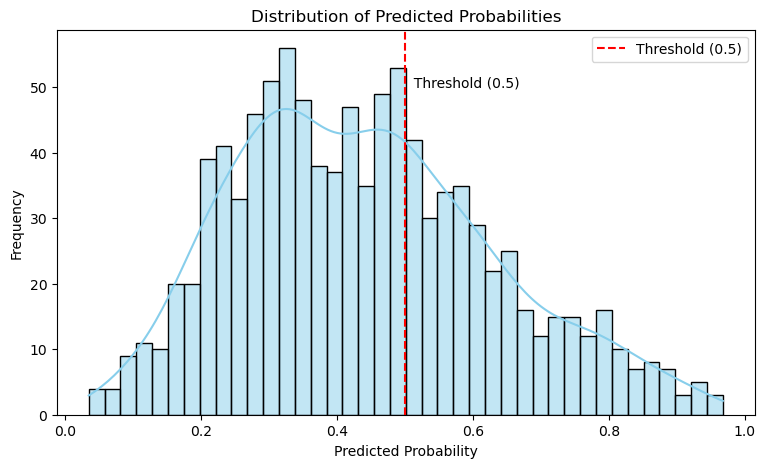

In [15]:
# Create a histogram
plt.figure(figsize=(9,5))
sns.histplot(data=predictions_df, x='activity10', kde=True,bins=40, color='skyblue')

# Add vertical lines to mark the threshold
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.text(0.5, 50, '  Threshold (0.5)', rotation=0, horizontalalignment='left')


# Set plot labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()


#Save the plot in data directory
path = '../figures/00_model_bias/Histogram01.png'
plt.savefig(path)


This model is detecting whether a particular drug is blocking the hERG channel or not. If we lower the threshold, the chances of having false negatives decrease. This means that if a drug is actually blocking the hERG channel and the model fails to identify it, it would be considered a false negative. In critical scenarios like this, it's crucial to minimize false negatives to prevent potential harm So, 
I have taken threshold as 0.
t The graph shows that the majority of molecules ha a probabilirs between 0.3 to 0.5. This means that these molecules probably won't block hERG, so most likely, they won't affect hERG activity.

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


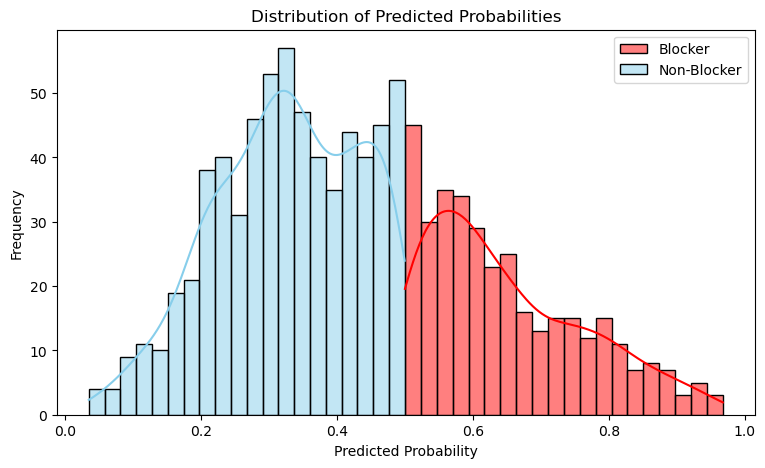

In [16]:
# Plot the distribution of probabilities for hERG blockers and non-blockers separately
threshold = 0.5
plt.figure(figsize=(9, 5))
sns.histplot(data=predictions_df[predictions_df['activity10'] >= threshold], x='activity10', color='red', kde=True, label='Blocker', bins=20)
sns.histplot(data=predictions_df[predictions_df['activity10'] < threshold], x='activity10', color='skyblue', kde=True, label='Non-Blocker', bins=20)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend();

#Save the plot in data directory
path = '../figures/00_model_bias/Histogram02.png'
plt.savefig(path)

plotting the distribution of probabilities for two categories: hERG blockers and non-blockers. We use a threshold of 0.5 to separate the probabilities into categories.

1. Blue bars: Represent the distribution of probabilities for molecules predicted to be hERG blockers (probabilities <= 0.5)
2. Red bars: Represent the distribution of probabilities for molecules predicted to be non-blockers (probabilities > 0.5)
   
By comparing the distributions of probabilities for these two categories, we can draw conclusions about the model performance:
Asf the distributions are well-separated, it indicates that the model is making clear distinctions between hERG blockers and non-blockers, which suggests good predictive performance. 

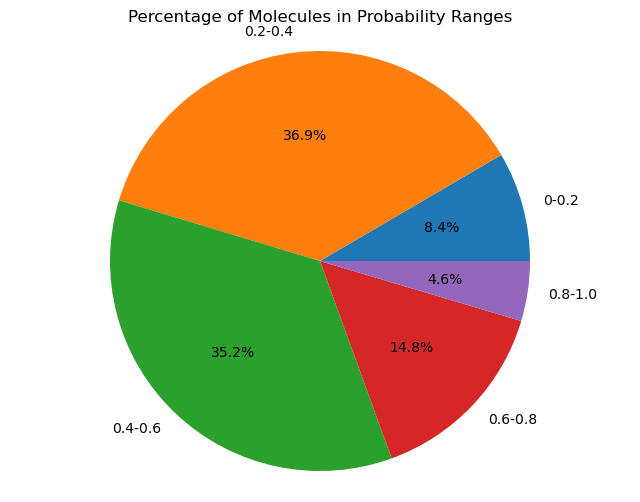

In [17]:
# Define probability ranges
probability_ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]

# Count the number of molecules in each range
molecules_in_ranges = []
for lower, upper in probability_ranges:
    molecules_in_range = ((predictions_df['activity10'] >= lower) & (predictions_df['activity10'] < upper)).sum()
    molecules_in_ranges.append(molecules_in_range)

# Calculate the percentage of molecules in each range
total_molecules = len(predictions_df)
percentages = [molecules / total_molecules * 100 for molecules in molecules_in_ranges]

# Plot the pie chart
plt.figure(figsize=(8,6))
plt.pie(percentages, labels=[f'{lower}-{upper}' for lower, upper in probability_ranges], autopct='%1.1f%%')
plt.title('Percentage of Molecules in Probability Ranges');
plt.axis('equal')

#Save the plot in data directory
path = '../figures/00_model_bias/PieChart01.png'
plt.savefig(path)

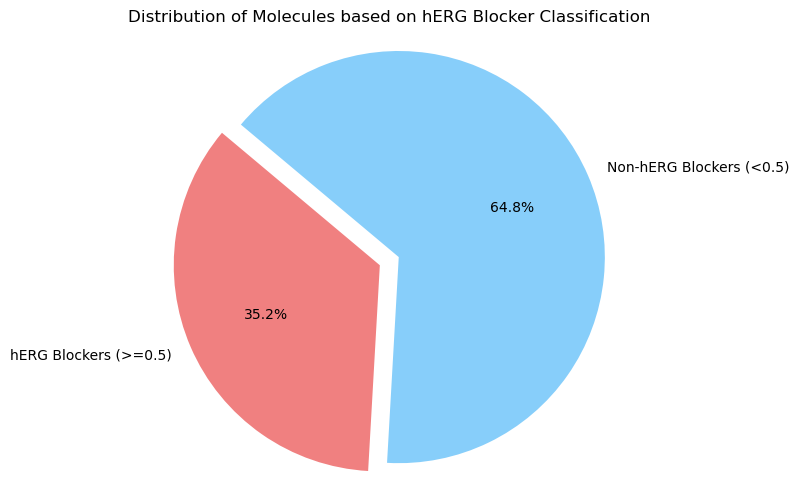

In [18]:
# Count the number of molecules with probability >= 0.5 and < 0.5
num_blockers = len(predictions_df[predictions_df['activity10'] >= 0.5])
num_non_blockers = len(predictions_df[predictions_df['activity10'] < 0.5])

# Create a pie chart
labels = ['hERG Blockers (>=0.5)', 'Non-hERG Blockers (<0.5)']
sizes = [num_blockers, num_non_blockers]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (hERG blockers)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Molecules based on hERG Blocker Classification')
plt.axis('equal')  

#Save the plot in data directory
path = '../figures/00_model_bias/PieChart02.png'
plt.savefig(path)

From the above pie chart, we can say that majority molecules fall into the non-blocker category when considering a threshold of 0.5. This observation implies a bias towards compounds not being hERG blockers.

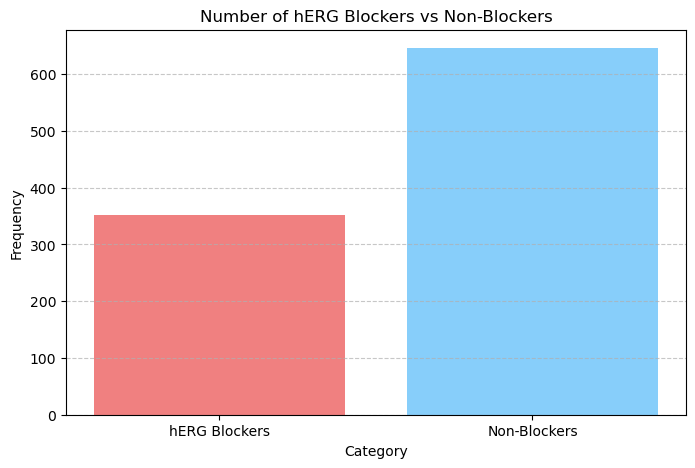

In [19]:
# Bar Chart
# Count the number of hERG blockers and non-blockers based on a threshold probability
threshold = 0.5
herg_blockers_count = len(predictions_df[predictions_df['activity10'] >= threshold])
herg_non_blockers_count = len(predictions_df[predictions_df['activity10'] < threshold])

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(['hERG Blockers', 'Non-Blockers'], [herg_blockers_count, herg_non_blockers_count], color=['lightcoral', 'lightskyblue'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Number of hERG Blockers vs Non-Blockers')
plt.grid(axis='y', linestyle='--', alpha=0.7);

#Save the plot in data directory
path = '../figures/00_model_bias/BarChart.png'
plt.savefig(path)

Based on the information presented in the bar chart and pie chart, it's evident that our dataset contains larger number of hERG blockers compared to non-blockersfication.

To better visualize the relationship,using the activity of molecules. lets make scatter plot,in scatter plot each point typically represents a combination of two numerical variables, one on the X-axis and one on the Y-axis.
To create a meaningful scatter plot, we can follow these steps:
1. Featurize the SMILES: Convert the SMILES representations of the compounds into numerical features that capture important characteristics of the molecules. One common approach is to use Morgan fingerprints, which encode molecular structure information into binary vectors.
    * **Molecular Fingerprint** ---
    Molecular fingerprints are descriptors that encode molecular features or fragments of a molecule as binary digits (0 or 1). Each bit in the fingerprint represents the presence or absence of a specific molecular feature or fragment in the molecule's structure. If a feature is present, it is represented by 1, and if it's absent, it's represented by 0. These fingerprints enable computational analyses of molecular structures.


2. Dimensionality Reduction: Since Morgan fingerprints typically result in high-dimensional feature vectors, we can apply dimensionality reduction techniques such as principal component analysis (PCA) to reduce the dimensionality to two dimensions. This allows us to visualize the data in a scatter plot.

3. Coloring by Category: Differentiate between hERG blockers and non-blockers by coloring the points differently based on their classification.

In [20]:
# Generate molecular fingerprints (Morgan fingerprints) for the SMILES data
def generate_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)  
    return list(fingerprint)

# Add a new column 'fingerprints' to predictions_df containing the molecular fingerprints
predictions_df['fingerprints'] = predictions_df['input'].apply(generate_fingerprints)

# Convert activity10 to a binary classification (0 or 1) based on a threshold
# Assuming a threshold of 0.8 for categorizing as hERG blocker or non-blocker
predictions_df['blocker'] = (predictions_df['activity10'] >= 0.5).astype(int)

predictions_df.head()

,key,input,activity10,fingerprints,blocker
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,0.347112,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,0.547030,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,0.178218,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,0.620462,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,0.623267,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


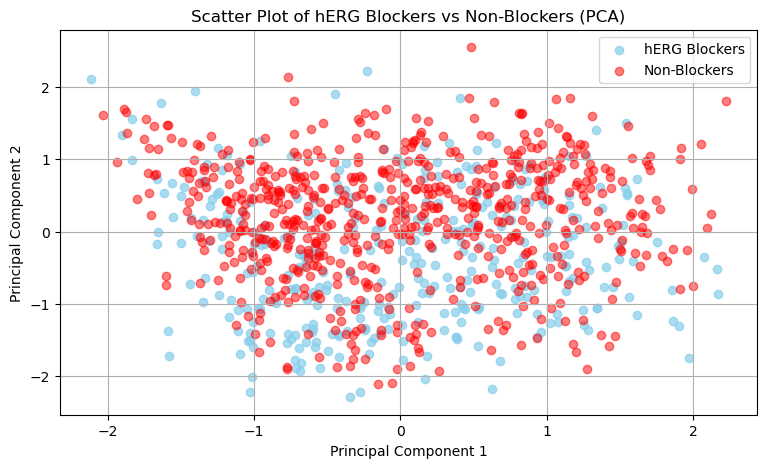

In [21]:
#Scatter Plot

# Convert the 'fingerprints' column to a numpy array
X = predictions_df['fingerprints'].values.tolist()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Separate the reduced data into hERG blockers and non-blockers
blockers = X_reduced[predictions_df['blocker'] == 1]
non_blockers = X_reduced[predictions_df['blocker'] == 0]

# Plot the scatter plot
plt.figure(figsize=(9, 5))
plt.scatter(blockers[:, 0], blockers[:, 1], color='skyblue',marker='o', label='hERG Blockers',alpha=0.7)
plt.scatter(non_blockers[:, 0], non_blockers[:, 1], color='red',marker='o', label='Non-Blockers',alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of hERG Blockers vs Non-Blockers (PCA)')
plt.legend()
plt.grid(True);

#Save the plot in data directory
path = '../figures/00_model_bias/ScatterPlot.png'
plt.savefig(path)

Here in the scatter plot, the red points represent hERG blockers with a probability greater than or equal to 0.5, while the blue squares represent non-blockers with a probability less than 0.5. However, due to significant overlap between the two classes, distinguishing between them becomes challenging. This overlap suggests that the features used for classification may not be distinct enough, impacting the model's ability to make accurate predictions and without a clear separation between the classes, the model may struggle to effectively differentiate between hERG blockers and non-blockers.